# **Stock Price Prediction using LSTM and RNN**

## Project Overview

Stock price prediction is a valuable tool in financial markets, benefiting businesses, investors, and financial institutions.

- For investors and fund managers, accurate stock price predictions enable better decision-making. These predictions help in identifying potential profit opportunities and minimizing losses, allowing for smarter allocation of capital and portfolio adjustments based on expected price changes.

- Machine learning and deep learning techniques have shown promise in improving stock price predictions, providing useful insights for businesses. These methods can refine investment strategies, offer a competitive edge, and enhance risk management in the complex stock market environment.

- Predicting stock prices is challenging due to market complexity and volatility. Traditional methods often struggle to capture subtle patterns in stock price data. However, recurrent neural networks (RNNs) and long short-term memory (LSTM) models are capable of revealing temporal relationships and making accurate predictions in various time series forecasting tasks.

- Throughout the project, we will explore the basics of RNNs and LSTMs and their ability to capture temporal patterns in stock price data. We will also cover data preparation steps to get historical stock price data ready for training and testing our models.

---

## **Outcomes**

* Load and preprocess time series data for stock prices, ensuring data quality and consistency.

* Approach stock price prediction as a time series forecasting problem, respecting the temporal order of data and creating distinct training and testing sets.

* Recurrent neural networks (RNNs) and their capacity to handle sequential data and capture temporal dependencies.

* Long short-term memory (LSTM) networks, a specialized variant of RNNs.

* Incorporation of additional features or factors, such as Relative Strength Index (RSI) and Exponential Moving Average (EMA), to create a multivariate input model that enhances prediction accuracy.

* Recognize the challenges and constraints inherent in stock price prediction, including market volatility, unforeseen events, and the presence of noise in financial markets.

---

## Key Libraries Used

* **yfinance**: yfinance simplifies the process of downloading historical market data from Yahoo Finance. [yfinance GitHub repository](https://github.com/ranaroussi/yfinance).

* **pandas_datareader**: pandas_datareader provides convenient access to online data sources, including Yahoo Finance, for retrieving financial data. [pandas_datareader documentation](https://pandas-datareader.readthedocs.io/)

* **pandas_ta**: pandas_ta expands Pandas capabilities by introducing technical analysis indicators for analyzing financial data. [pandas_ta GitHub repository](https://github.com/twopirllc/pandas-ta).

### Install Packages


In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Import Libraries**

In [2]:
# Improrting libraries
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import pandas_ta as ta
from projectpro import model_snapshot, checkpoint
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# Set the image data format for Keras to "channels_last"
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight") 
%matplotlib inline

# Override Yahoo Finance downloader to use pandas_datareader
#yf.pdr_override() 

## **Simple Neural Network in Tensorflow**

In [8]:
# List of abalone features including length, diameter, height, and various weight measurements
abalone_features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", 
                    "Viscera weight", "Shell weight", "Age"]


In [9]:
# Load training and test data for abalones from external sources
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=abalone_features)

abalone_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv",
    names=abalone_features)


In [10]:
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [11]:
# Create a copy of the abalone training data for features
abalone_train_features = abalone_train.copy()

# Extract and remove the 'Age' column to use as labels
abalone_train_labels = abalone_train_features.pop('Age')


In [12]:
# Create a copy of the abalone test data for features
abalone_test_features = abalone_test.copy()

# Extract and remove the 'Age' column to use as labels for testing
abalone_test_labels = abalone_test_features.pop('Age')


### **Importance of Normalization in Neural Networks**

Normalization is a crucial process in neural network training. It equalizes feature scales, speeds up convergence, enhances numerical stability, and boosts generalization. It ensures that the network learns effectively, prevents issues with different data scales, and contributes to better overall performance.

In [13]:
# Normalization layer
normalize = tf.keras.layers.Normalization()

# Adapt the normalization layer to the training features
normalize.adapt(abalone_train_features)


UnboundLocalError: cannot access local variable 'input_shape' where it is not associated with a value

In [76]:
# Create an Abalone model using a sequential architecture
abalone_model = tf.keras.Sequential([
    # Use the previously created normalization layer
    normalize,
    
    # Add a dense layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Add the output layer with a single unit (regression task)
    tf.keras.layers.Dense(1)
])


In [77]:
# Compile the Abalone model with the specified loss and optimizer
abalone_model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # Mean squared error loss for regression
    optimizer=tf.keras.optimizers.Adam()      # Adam optimizer for gradient-based training
)


In [78]:
# Train the Abalone model on the training data for 10 epochs
abalone_model.fit(
    abalone_train_features,   # Training features
    abalone_train_labels,     # Training labels
    epochs=10                 # Number of training epochs
)


Epoch 1/10
104/104 [==============================] - 1s 1ms/step - loss: 91.4759
Epoch 2/10
104/104 [==============================] - 0s 955us/step - loss: 51.4233
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 15.3582
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 5.6283
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 5.0043
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9691
Epoch 7/10
104/104 [==============================] - 0s 946us/step - loss: 4.9379
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9343
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9329
Epoch 10/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9232


In [79]:
predictions = abalone_model.predict(abalone_test_features)

27/27 [==============================] - 0s 616us/step


In [ ]:
# Create a MeanSquaredError metric
squared_error = tf.keras.metrics.MeanSquaredError()

# Update the metric's state with the true labels (abalone_test_labels) and model predictions
squared_error.update_state(abalone_test_labels, predictions)


In [81]:
print(f'Mean Squared error for test set: {squared_error.result().numpy()}')

Mean Squared error for test set: 5.567309856414795


## **Time Series Data**

### Loading data

In [4]:
import yfinance as yf
yf.__version__

'0.2.54'

In [5]:
yf.download('AAPL')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...
2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400
2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500


In [7]:
# Retrieve historical stock price data for AAPL from Yahoo Finance
dataset = yf.download('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [8]:
dataset.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375390,12.413609,12.308282,12.320320,302220800
2012-01-04,12.441891,12.479208,12.316702,12.338369,260022000
2012-01-05,12.580026,12.595674,12.418724,12.487338,271269600
2012-01-06,12.711535,12.722068,12.615838,12.632389,318292800
2012-01-09,12.691372,12.872535,12.679936,12.804825,394024400


### Plotting training and test data

In [9]:
# Define the start and end years

tstart = 2016  # Start year
tend = 2020    # End year


In [10]:
# Define a function to plot training and test data for a given time period
def train_test_plot(dataset, tstart, tend):
    # Plot the high stock prices for the specified time period (training data)
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    
    # Plot the high stock prices for the time period beyond the specified end year (test data)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    
    # Add legends and title to the plot
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Apple stock price")
    
    # Display the plot
    plt.show()


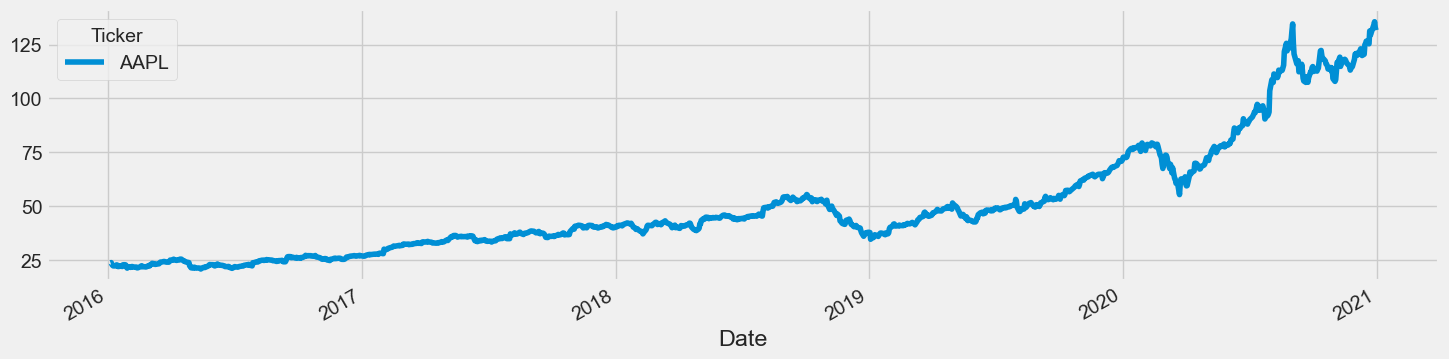

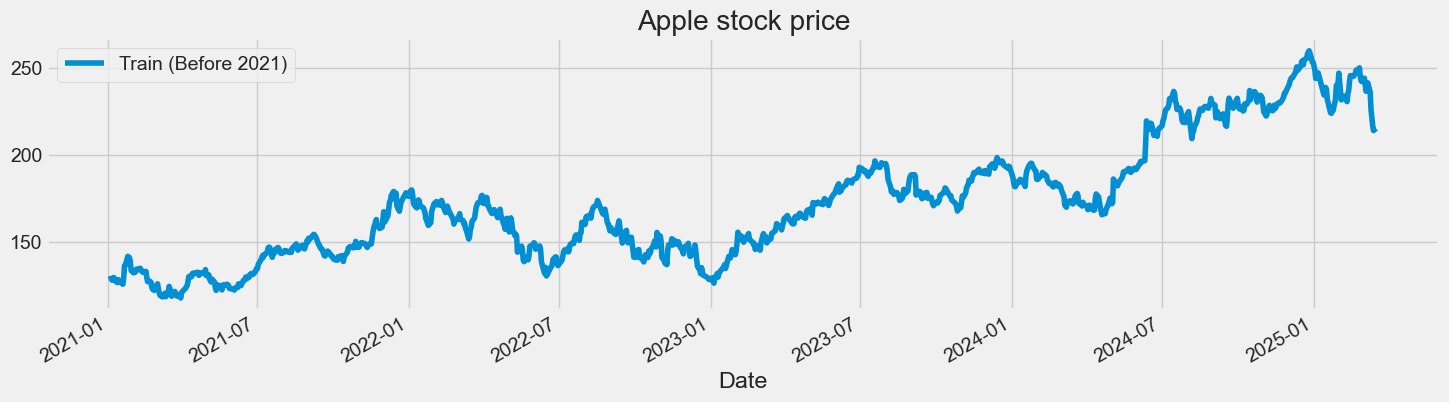

In [11]:
train_test_plot(dataset, tstart, tend)

### Creating train and test datasets

In [12]:
# Define a function to split a dataset into training and test subsets based on time periods
def train_test_split(dataset, tstart, tend, columns=['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values
    test = dataset.loc[f"{tend+1}":, columns].values
    
    return train, test


In [13]:
# Split the 'dataset' into training and test sets based on the 'tstart' and 'tend' time range
training_set, test_set = train_test_split(dataset, tstart, tend)


### Scaling dataset values

In [14]:
# Create a Min-Max Scaler with the specified feature range
sc = MinMaxScaler(feature_range=(0, 1))

# Reshape the training set for compatibility with the scaler
training_set = training_set.reshape(-1, 1)

# Scale the training set data and store the scaled values in 'training_set_scaled'
training_set_scaled = sc.fit_transform(training_set)


### Creating overlapping window batches

In [15]:
n_steps = 1      # Number of time steps in each sequence
features = 1     # Number of features in each time step


In [17]:
# Define a function to split a sequence into input and output sequences for time series forecasting
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [18]:
# Split the scaled training set data into input sequences (X_train) and output sequences (y_train)
X_train, y_train = split_sequence(training_set_scaled, n_steps)


In [19]:
# Reshape X_train to match the required input shape for the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)


### Evaluation

In [21]:
# Define a function to plot real and predicted values for time series forecasting
def plot_predictions(test, predicted, title):
    # Plot the real values in gray
    plt.plot(test, color="gray", label="Real")
    
    # Plot the predicted values in red
    plt.plot(predicted, color="red", label="Predicted")
    
    # Set the title and labels for the plot
    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')
    
    # Add a legend to differentiate real and predicted values
    plt.legend()
    
    # Show the plot
    plt.show()


In [22]:
# Define a function to calculate and print the root mean squared error (RMSE)
def return_rmse(test, predicted):
    # Calculate the RMSE using the mean_squared_error function from scikit-learn
    rmse = np.sqrt(mean_squared_error(test, predicted))
    
    # Print the RMSE
    print("The root mean squared error is {:.2f}.".format(rmse))


## **Recurrent Neural Networks**

### Vanilla RNN

In [23]:
# Define a function to plot the training loss over epochs
def plot_loss(history):
    # Create a figure with a specified size
    plt.figure(figsize=(15, 10))
    
    # Plot the training loss from the 'history' object
    plt.plot(history.history['loss'], label='loss')
    
    # Add a legend and display the plot
    plt.legend(loc='best')
    plt.show()


In [25]:
# Create an RNN model for time series forecasting
model_rnn = Sequential()

# Add a SimpleRNN layer with 125 units and the specified input shape
model_rnn.add(SimpleRNN(units=125, input_shape=(n_steps, features)))

# Add a Dense layer with 1 unit for regression output
model_rnn.add(Dense(units=1))


In [26]:
# Compile the RNN model with the RMSprop optimizer and mean squared error (MSE) loss
model_rnn.compile(optimizer="RMSprop", loss="mse")


In [27]:
# Fit the RNN model to the training data for 10 epochs, using a batch size of 32
# The training history is stored in the 'history' variable

history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)



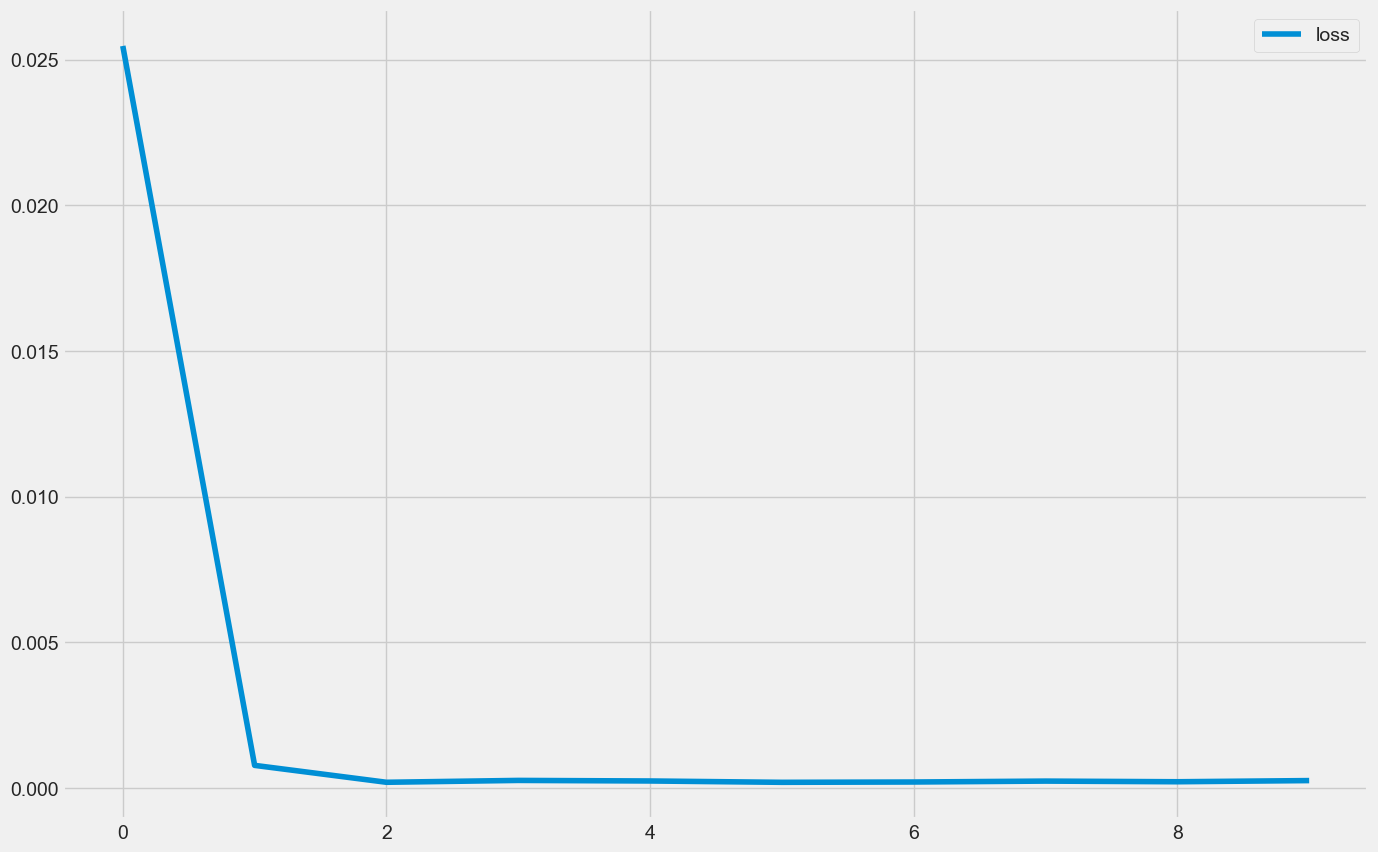

In [28]:
plot_loss(history)

## **Time Series Prediction**

Time series prediction can be approached in different ways. One common method involves using historical data to predict a single future data point based on a previous data window. However, this approach may not be suitable when the goal is to predict data points over a longer future timeframe.

For instance, in stock price prediction, the objective is often to forecast the price of a specific stock over the course of several days or weeks. In such cases, a different approach known as sequence generation is necessary. Sequence generation uses previously predicted values within a moving window to forecast future data points.

It's important to be aware that this approach can introduce varying levels of inaccuracy into the predictions, as they may not always be entirely precise.

In [29]:
# Scale the test data using the MinMaxScaler 'sc' previously fitted on the training data
inputs = sc.transform(test_set.reshape(-1, 1))

In [30]:
# Split the scaled test data into input samples and target values
X_test, y_test = split_sequence(inputs, n_steps)

# Reshape the input samples to match the model's input shape
X_test = X_test.reshape(-1, n_steps, features)


In [31]:
# Use the trained RNN model to make predictions on the test data
predicted_stock_price = model_rnn.predict(X_test)

# Inverse transform the predicted values to their original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


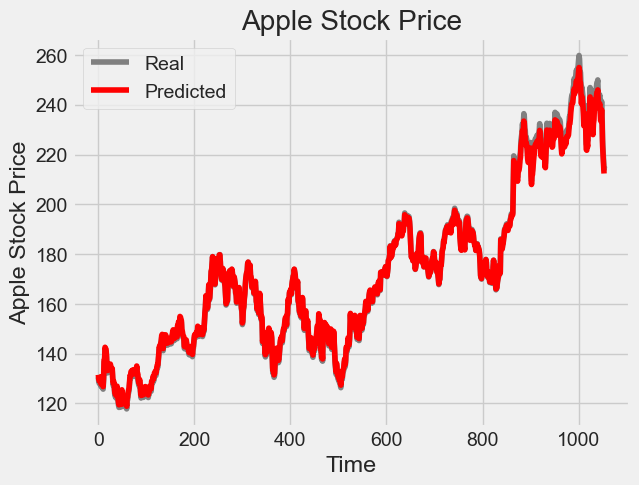

In [32]:
# Plot the real stock prices (test_set) and the predicted stock prices for Apple
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")


### Sequence Generation

In [33]:
steps_in_future = 25

In [34]:
def sequence_generation(dataset: pd.DataFrame, sc: MinMaxScaler, model: Sequential, steps_future: int):
    # Extract the 'High' column
    high_dataset = dataset.iloc[len(dataset) - len(test_set) - n_steps:]["High"]

    # Scale the 'High' column using the MinMaxScaler
    high_dataset = sc.transform(high_dataset.values.reshape(-1, 1))

    # Initialize the inputs with the first n_steps values of the scaled 'High' dataset
    inputs = high_dataset[:n_steps]

    # Generate predictions for steps_future time steps into the future
    for _ in range(steps_future):
        # Predict the next value based on the previous n_steps values using the model
        curr_pred = model.predict(inputs[-n_steps:].reshape(-1, n_steps, features), verbose=0)

        # Append the predicted value to the inputs for the next iteration
        inputs = np.append(inputs, curr_pred, axis=0)

    # Inverse transform the scaled values to obtain the final predicted values
    return sc.inverse_transform(inputs[n_steps:])


In [35]:
# Using sequence_generation function to generate a sequence of future values
results = sequence_generation(dataset, sc, model_rnn, steps_in_future)


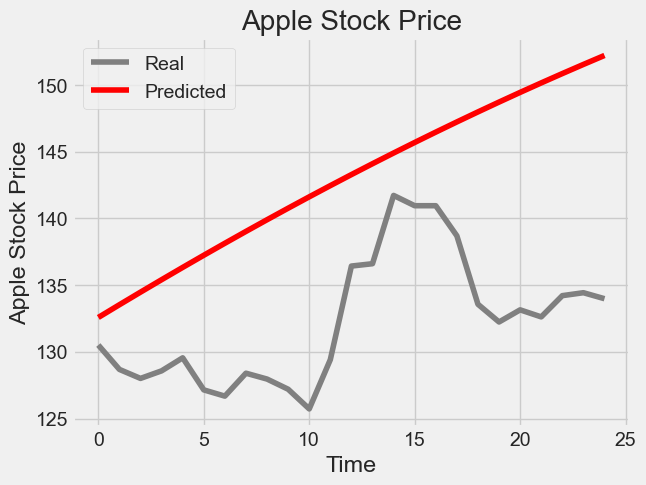

In [36]:
# Visualize the predicted values against the actual test data for "Apple Stock Price"
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")


---

## **LSTM**

In [38]:
# Create a Sequential model
model_lstm = Sequential()

# Add an LSTM layer with 125 units and specify the input shape
model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))

# Add a Dense layer with 1 unit for the final output
model_lstm.add(Dense(units=1))


In [39]:
# Compile the model using the RMSprop optimizer and (MSE) as the loss function
model_lstm.compile(optimizer="RMSprop", loss="mse")


In [40]:
# Fit the model using the training data
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)


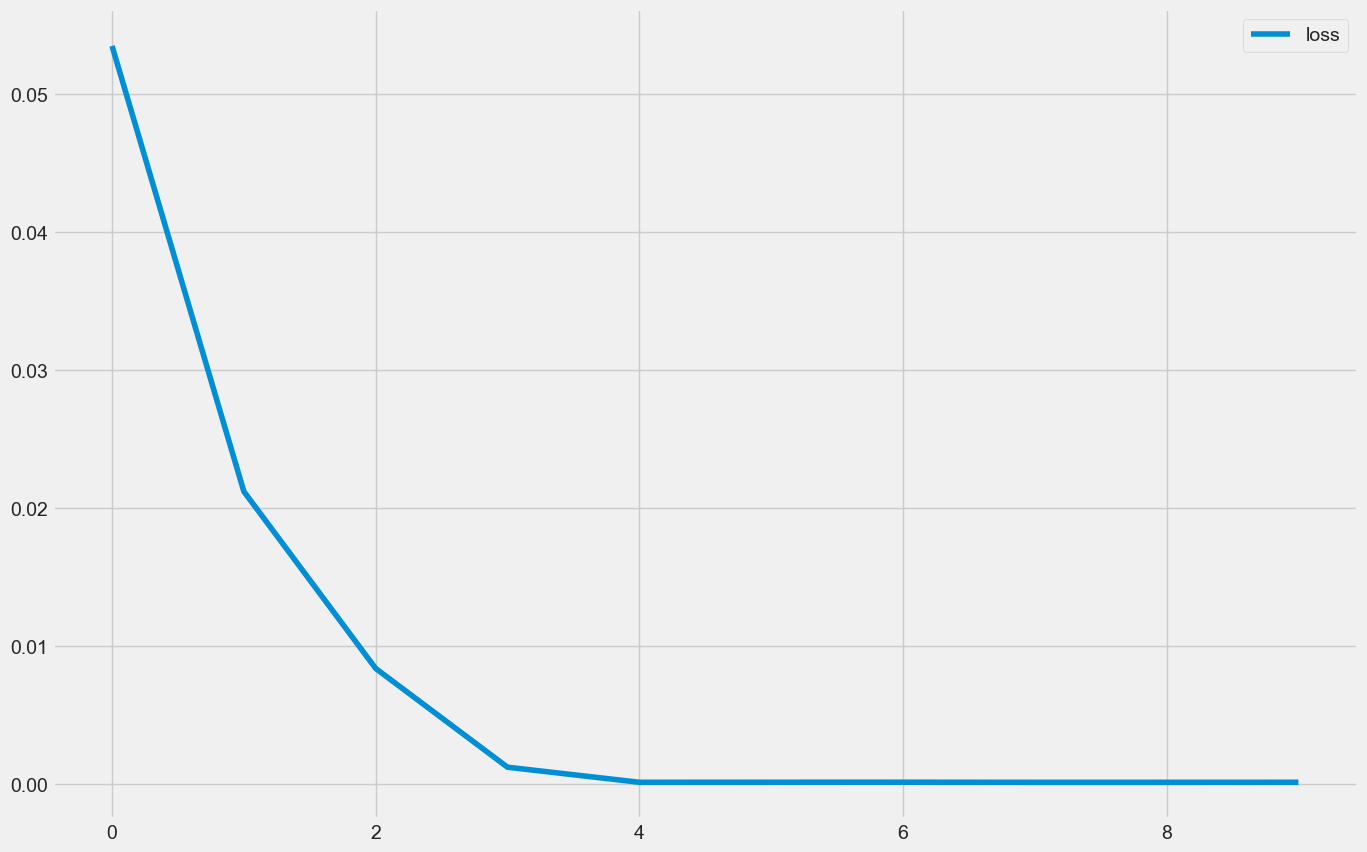

In [41]:
plot_loss(history)

In [42]:
# Make predictions on the test data using the trained model
predicted_stock_price = model_lstm.predict(X_test)

# Inverse transform the scaled predictions to obtain the original values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


### Time Series Prediction: LSTM

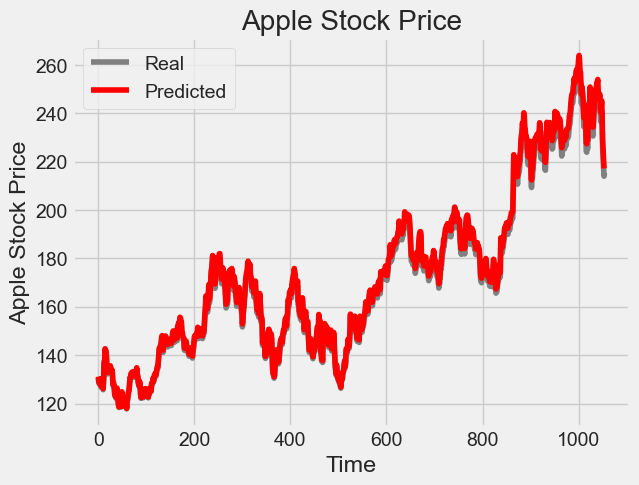

In [43]:
# Visualize the predicted values against the actual test data for "Apple Stock Price"
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")

### Sequence Generation: LSTM

In [44]:
# Using sequence_generation function with the LSTM model to generate a sequence of future values
results = sequence_generation(dataset, sc, model_lstm, steps_in_future)


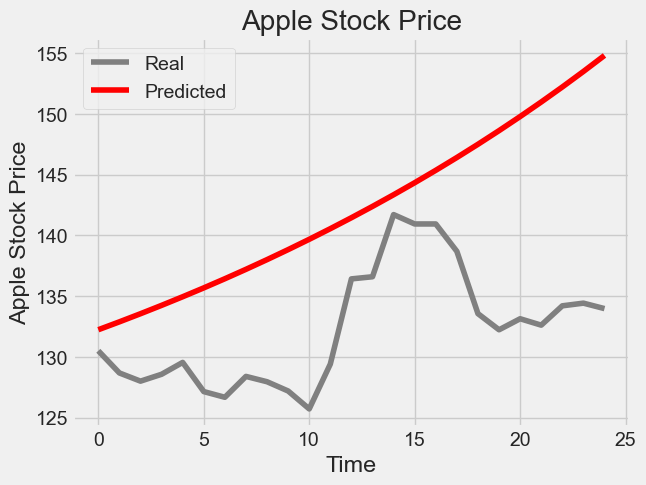

In [45]:
# Plotting the first 'steps_in_future' values from the test_set against the 'results' for "Apple Stock Price"
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")


---

## Multivariate Input

Recurrent Neural Networks (RNNs) can handle data with multiple dimensions, just like how they deal with multidimensional data such as images. In this case, each dimension represents a different set of data over time. Here, we compute technical indicators that are related to stock prices, aiming to predict gains.

In [117]:
# Set the value of 'mv_features' to 6
mv_features = 6


In [118]:
# Create a copy of the 'dataset' and store it in 'multi_variate_df'
multi_variate_df = dataset.copy()


### Creating Technical Indicators

**Relative Strength Index (RSI)**: The Relative Strength Index (RSI) is a momentum indicator utilized in technical analysis. It assesses the speed and size of recent price changes for a security to determine whether it is overvalued or undervalued.

**Exponential Moving Average (EMA)**: An Exponential Moving Average (EMA) is a type of moving average that assigns greater importance to recent data points. It is also known as an exponentially weighted moving average. An EMA reacts more strongly to recent price changes compared to a simple moving average (SMA), which treats all observations in the period equally. Traders often use various EMA lengths, such as 10-day, 50-day, and 200-day moving averages.



In [119]:
# Calculate and add the Relative Strength Index (RSI) with a length of 15 to the DataFrame
multi_variate_df['RSI'] = ta.rsi(multi_variate_df.Close, length=15)

# Calculate and add the Exponential Moving Average (EMA) with a length of 20 to the DataFrame
multi_variate_df['EMAF'] = ta.ema(multi_variate_df.Close, length=20)

# Calculate and add the Exponential Moving Average (EMA) with a length of 100 to the DataFrame
multi_variate_df['EMAM'] = ta.ema(multi_variate_df.Close, length=100)

# Calculate and add the Exponential Moving Average (EMA) with a length of 150 to the DataFrame
multi_variate_df['EMAS'] = ta.ema(multi_variate_df.Close, length=150)


### Creating Labels

Labels are generated by calculating the price difference between the closing prices of a share at different points in time. These labels serve as a way to quantify and track changes in stock prices.

In [120]:
# Create a 'Target' column by subtracting the 'Open' price from the 'Adj Close' price
multi_variate_df['Target'] = multi_variate_df['Adj Close'] - dataset.Open

# Shift the 'Target' column up by one row to align it with the previous day's data
multi_variate_df['Target'] = multi_variate_df['Target'].shift(-1)

# Drop rows with missing values (NaN) to ensure data integrity
multi_variate_df.dropna(inplace=True)

# Remove the 'Volume' and 'Close' columns from the DataFrame
multi_variate_df.drop(['Volume', 'Close'], axis=1, inplace=True)


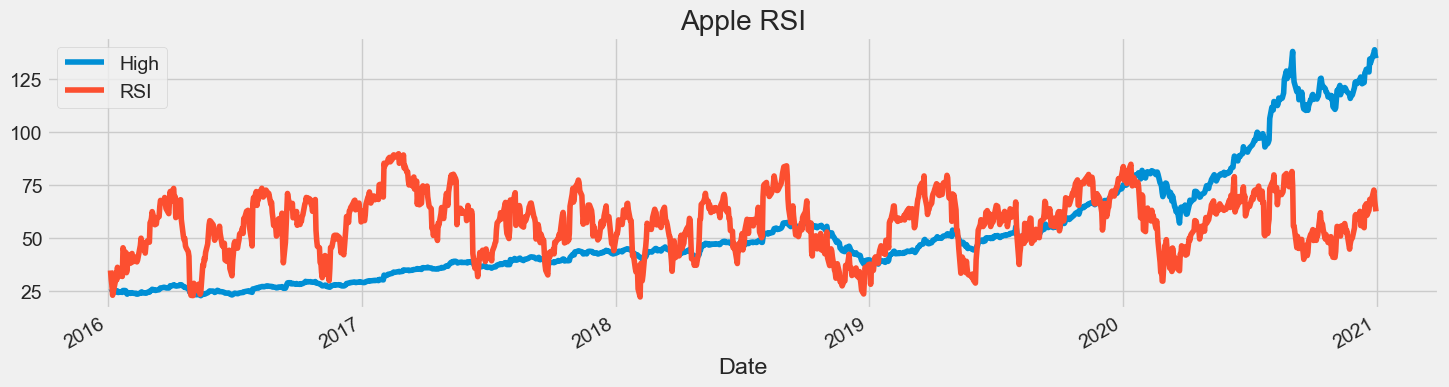

In [121]:
# Plot the 'High' and 'RSI' columns from the 'multi_variate_df' DataFrame
# Using the time period specified by 'tstart' and 'tend'
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'RSI']].plot(figsize=(16, 4), legend=True)

# Set the title for the plot
plt.title("Apple RSI")

# Display the plot
plt.show()


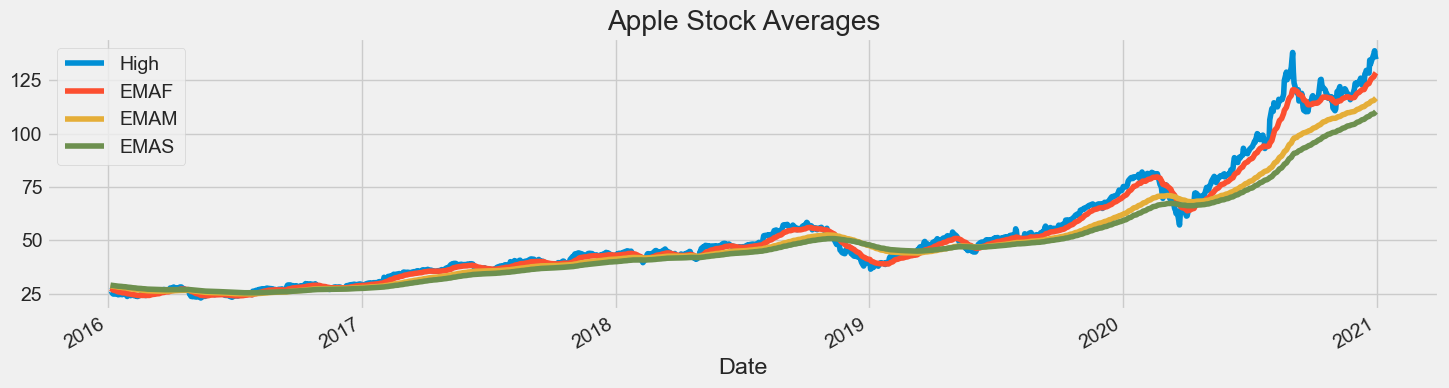

In [122]:
# Plot the 'High', 'EMAF', 'EMAM', and 'EMAS' columns from the 'multi_variate_df' DataFrame
# Within the time period specified by 'tstart' and 'tend'
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'EMAF', 'EMAM', 'EMAS']].plot(figsize=(16, 4), legend=True)

# Set the title for the plot
plt.title("Apple Stock Averages")

# Display the plot
plt.show()


In [123]:
# Define a list of feature columns that will be used for training
feat_columns = ['Open', 'High', 'RSI', 'EMAF', 'EMAM', 'EMAS']

# Define a list containing the label column used for training, which is 'Target'
label_col = ['Target']


### Splitting train and test data

In [124]:
# Split the 'multi_variate_df' into training and test sets
# The time period is specified by 'tstart' and 'tend'
# Feature columns and the label column are combined into a list for column selection
mv_training_set, mv_test_set = train_test_split(multi_variate_df, tstart, tend, feat_columns + label_col)


In [125]:
# Extract the input features for training data by selecting all columns except the last one
X_train = mv_training_set[:, :-1]

# Extract the labels for training data by selecting the last column
y_train = mv_training_set[:, -1]

# Extract the input features for testing data by selecting all columns except the last one
X_test = mv_test_set[:, :-1]

# Extract the labels for testing data by selecting the last column
y_test = mv_test_set[:, -1]


### Scaling Data

In [126]:
# Create a MinMaxScaler with a feature range of (0, 1)
mv_sc = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data using the MinMaxScaler and reshape it for LSTM input
X_train = mv_sc.fit_transform(X_train).reshape(-1, 1, mv_features)

# Transform the testing data using the same scaler and reshape it for LSTM input
X_test = mv_sc.transform(X_test).reshape(-1, 1, mv_features)


### Model

In [127]:
# Create a Sequential model
model_mv = Sequential()

# Add an LSTM layer with 125 units and specify the input shape for multi-variate features
model_mv.add(LSTM(units=125, input_shape=(1, mv_features))

# Add a Dense layer with 1 unit for the final output
model_mv.add(Dense(units=1))

# Compile the model using the RMSprop optimizer and Mean Squared Error (MSE) as the loss function
model_mv.compile(optimizer="RMSprop", loss="mse")


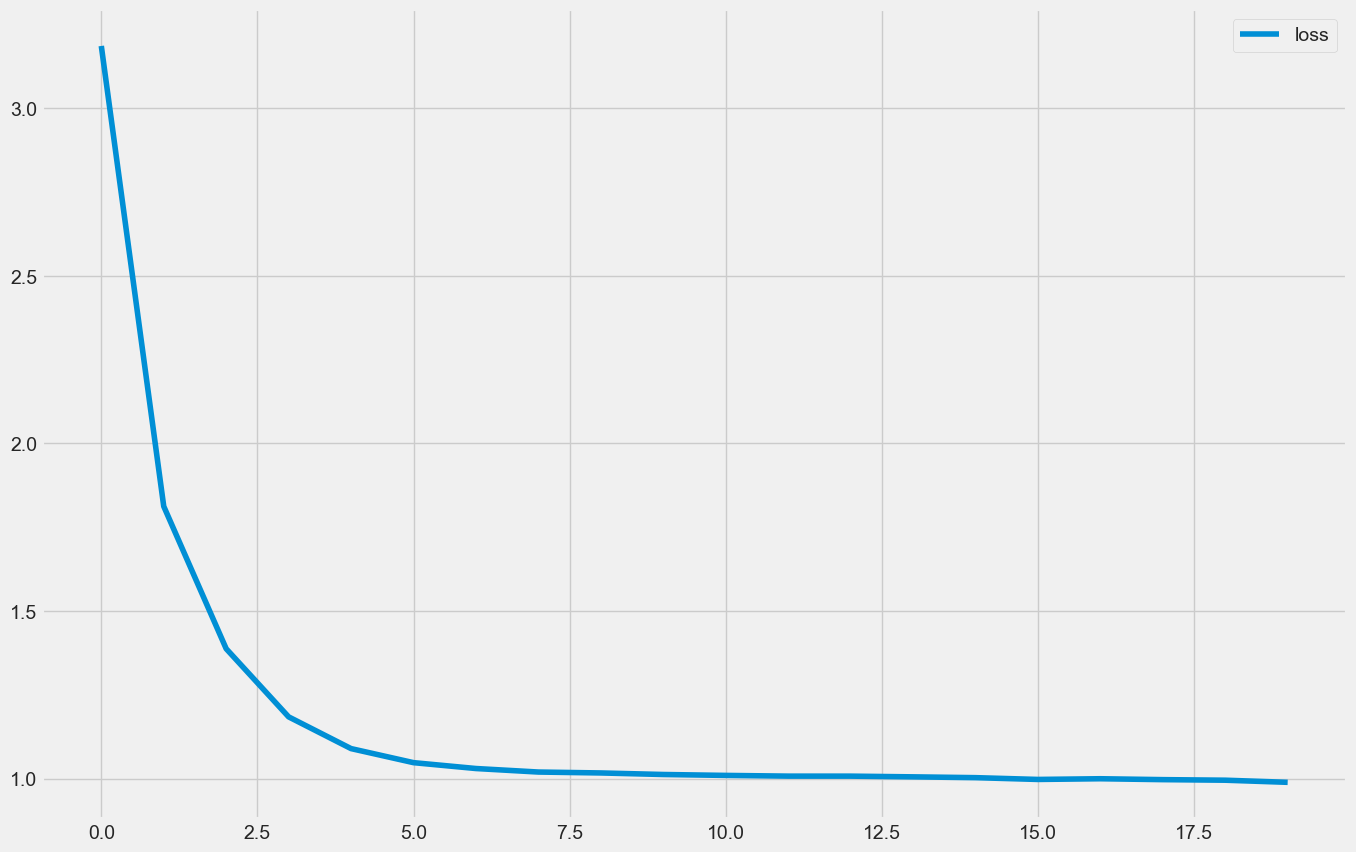

In [128]:
# Train the 'model_mv' on the training data for 20 epochs with a batch size of 32
history = model_mv.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Plot the loss during training using the 'plot_loss' function (assuming it exists)
plot_loss(history)


### Results

19/19 [==============================] - 0s 2ms/step


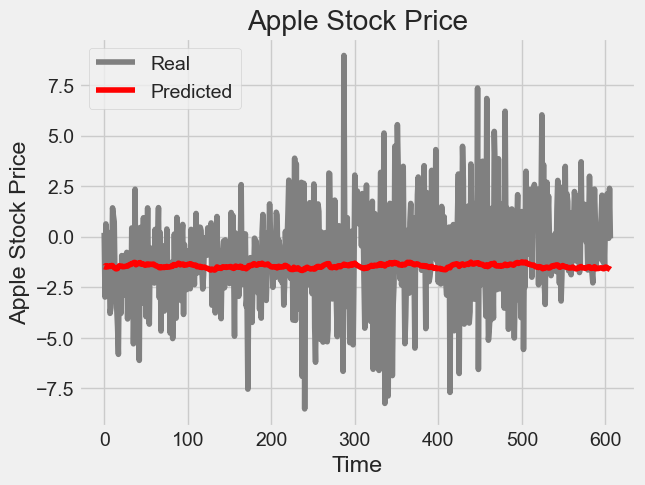

In [129]:
# Make predictions on the testing data using the 'model_mv'
predictions = model_mv.predict(X_test)

# Plot the actual test data (y_test) against the predicted values (predictions) for "Apple Stock Price"
plot_predictions(y_test, predictions, "Apple Stock Price")


## **Conclusion**

- Explored the use of Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) models for stock price prediction.
- Followed a step-by-step approach to understand concepts, preprocess data, build models, and evaluate performance.
- Gained insights into the complexities and challenges of stock price prediction.
- Learned data preprocessing, neural network model construction, and performance evaluation.

---
